In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../../Data/model_3_pre_feat_selection.csv") #Choose correct path

In [3]:
mean_wl_time = df['wl_time'].mean()
print(f"Mean waiting list time: {mean_wl_time}")

df['wl_time'] = df['wl_time'].apply(lambda x: 0 if x < mean_wl_time else 1)
print(df['wl_time'].value_counts(normalize=True))



Mean waiting list time: 192.52839426430694
0    0.716807
1    0.283193
Name: wl_time, dtype: float64


In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import seaborn as sns

#Keep first 500 rows for faster processing
# df = df[:500]


X = df.drop(['wl_time'], axis=1) #Remember to also drop the features that we're not chosen in the feature selection
y = df['wl_time']

one_hot_cols = [col for col in df.columns if df[col].nunique() <= 10]
columns_to_scale = [col for col in X.columns if col not in one_hot_cols]
# scale all columns except the one-hot encoded ones
scaler = StandardScaler()
X[columns_to_scale] = scaler.fit_transform(X[columns_to_scale])


F1 score pre feature selection: 0.3525020592378437
F1 macro score pre feature selection: 0.594393079861643


<Axes: >

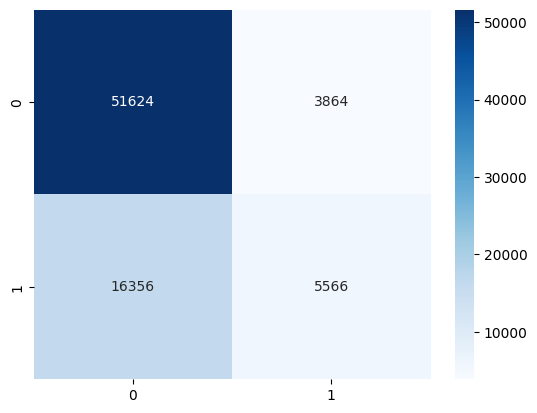

In [5]:
from sklearn.model_selection import cross_val_predict

log = LogisticRegression(max_iter=1000)
f1_scores = cross_val_score(log, X, y, cv=5, scoring='f1').mean()
f1_macro_scores = cross_val_score(log, X, y, cv=5, scoring='f1_macro').mean()

print(f"F1 score pre feature selection: {f1_scores}")
print(f"F1 macro score pre feature selection: {f1_macro_scores}")

# plot confusion matrix using sns seaborn
y_pred = cross_val_predict(log, X, y, cv=5) 
sns.heatmap(confusion_matrix(y, y_pred), annot=True, cmap='Blues', fmt='g')